[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.1240707e-10
 -1.3154040e-10  0.0000000e+00]
22050
123.046875 [20 42 63]
[0.46439909 0.9752381  1.46285714]


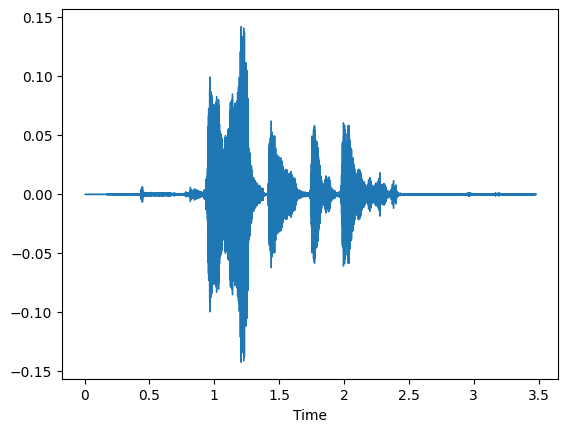

In [6]:
import librosa
import librosa.display
import IPython.display as ipd

y, sr = librosa.load("AI in Speech Processing.mp3")
librosa.display.waveshow(y)

In [7]:
ipd.Audio("AI in Speech Processing.mp3")

In [13]:
#Low Sampling Rate
ipd.Audio(y,rate=10000)

In [10]:
#High Sampling Rate
ipd.Audio(y,rate=40000)

In [60]:
#Reversed Audio
ipd.Audio(y[::-1],rate=sr)

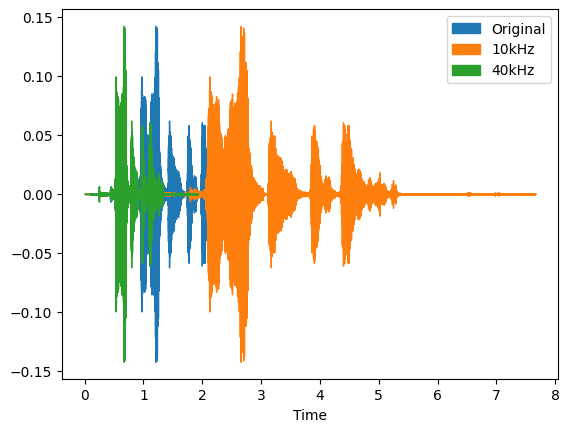

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax, label='Original')
librosa.display.waveshow(y, sr=10000, ax=ax, label='10kHz')
librosa.display.waveshow(y, sr=40000, ax=ax, label='40kHz')
ax.legend()

In [17]:
print(y)
print(sr)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(tempo,beat_frames)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.1240707e-10
 -1.3154040e-10  0.0000000e+00]
22050
123.046875 [20 42 63]
[0.46439909 0.9752381  1.46285714]


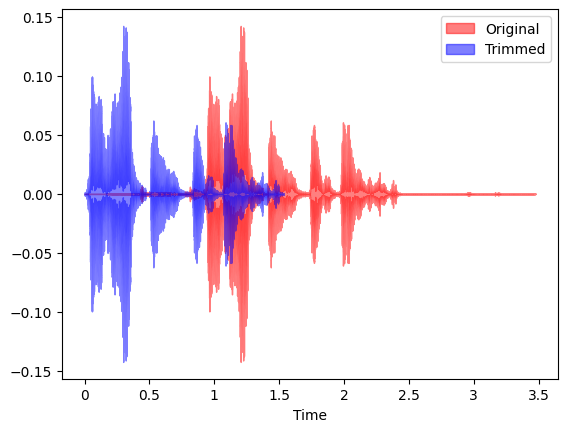

In [31]:
import matplotlib.pyplot as plt
trimmed_audio = librosa.effects.trim(y,top_db=30)
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(y, sr=sr, alpha=0.5, color='r',ax=ax, label='Original')
librosa.display.waveshow(trimmed_audio[0], alpha=0.5, color='b',ax=ax, label='Trimmed')
ax.legend()
ipd.Audio(trimmed_audio[0],rate=sr)

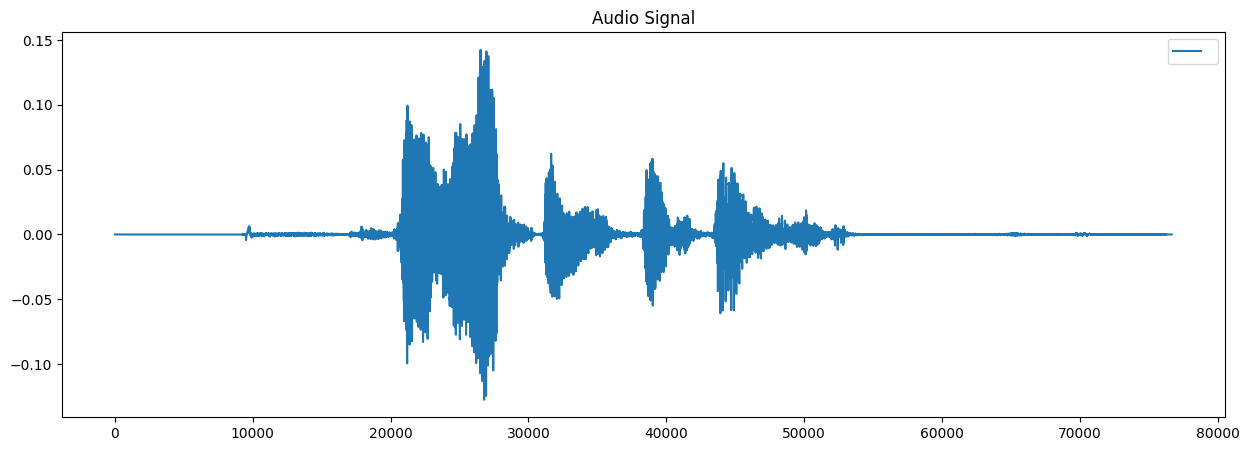

In [41]:
import pandas as pd
pd.Series(y).plot(figsize=(15,5),title="Audio Signal",legend=True)
plt.show()

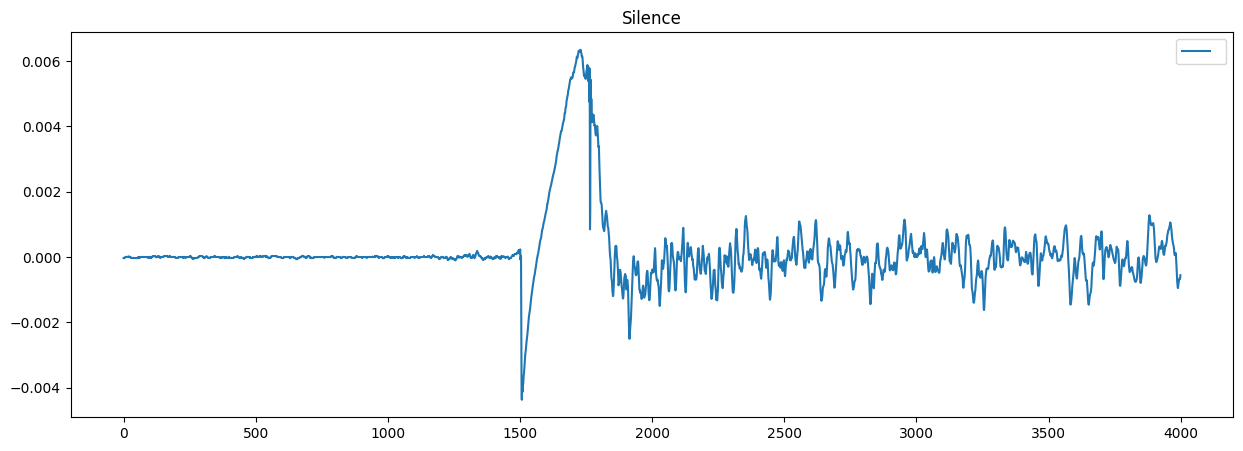

In [45]:
pd.Series(y[8000:12000]).plot(figsize=(15,5),title="Silence",legend=True)
plt.show()

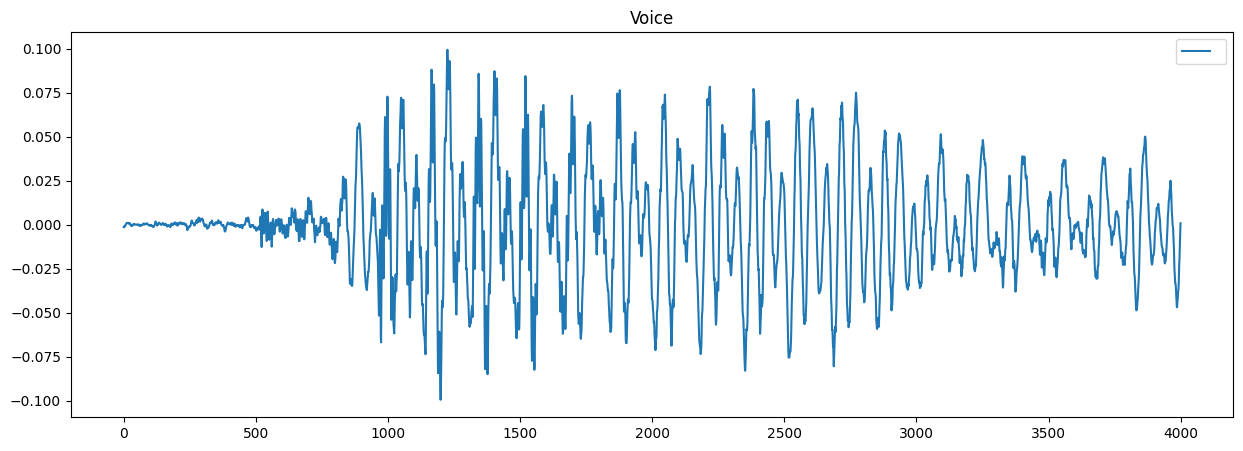

In [49]:
pd.Series(y[20000:24000]).plot(figsize=(15,5),title="Voice",legend=True)
plt.show()

In [58]:
import numpy as np
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

D2 = librosa.stft(trimmed_audio[0])
S_db2 = librosa.amplitude_to_db(np.abs(D2), ref=np.max)


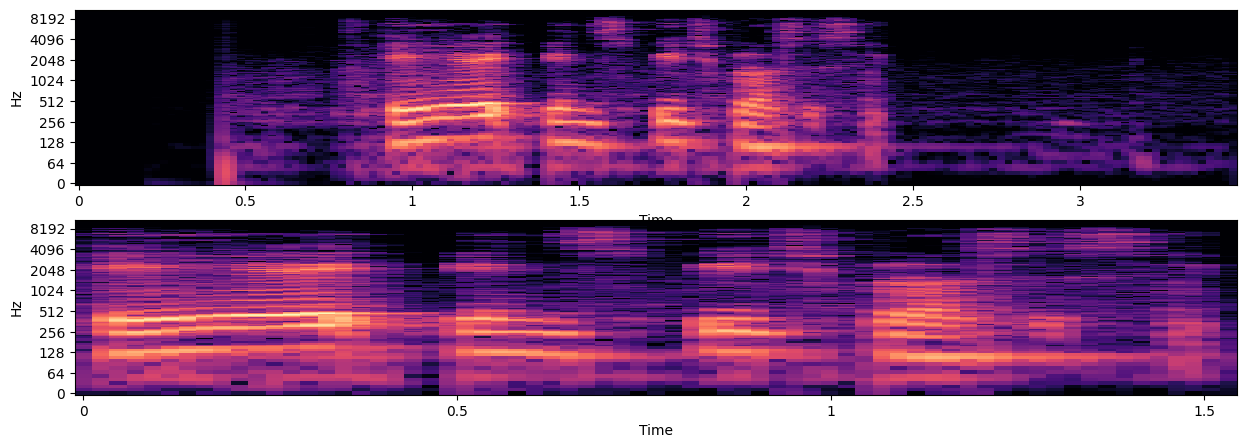

In [59]:
fig,ax = plt.subplots(nrows=2, figsize=(15,5))
img = librosa.display.specshow(S_db, x_axis='time',ax=ax[0], y_axis='log')
img2 = librosa.display.specshow(S_db2, x_axis='time',ax=ax[1], y_axis='log')